**Question 1:  What is K-Nearest Neighbors (KNN) and how does it work in both classification and regression problems?**

 Answer: Answer:

K-Nearest Neighbors (KNN) is a supervised learning algorithm used for both classification and regression.
It makes predictions based on the similarity (closeness) of data points in the feature space.

🔹 How KNN Works

Choose a number K (the number of neighbors to look at).

Calculate the distance (e.g., Euclidean distance) between the new data point and all training points.

Pick the K closest neighbors.

For Classification:

The new point is assigned the majority class among the K neighbors.

Example: If 3 out of 5 neighbors are "Yes" → predict "Yes".

For Regression:

The prediction is the average (or weighted average) of the K neighbors’ values.

Example: If neighbors’ values are [5, 6, 7] → prediction = (5+6+7)/3 = 6.

🔹 Key Notes

K is important:

Small K → sensitive to noise.

Large K → smoother, but may lose detail.

No training phase (lazy learner) → stores all training data.

Works best when features are scaled/normalized.

**Question 2: What is the Curse of Dimensionality and how does it affect KNN performance?**

 Answer: 🔹 Curse of Dimensionality

The curse of dimensionality refers to problems that arise when working with high-dimensional data (datasets with many features).
As the number of dimensions (features) increases:

Data points become sparse (spread out).

Distances between points become less meaningful.

Models like KNN that rely on distance measures struggle.

🔹 How It Affects KNN

Distance loses meaning:
In high dimensions, the distance between the closest and farthest neighbors becomes almost the same. KNN cannot clearly decide which points are truly "close".

More computation:
KNN has to calculate distances across many features → higher computation time.

Risk of overfitting:
With too many features, KNN may fit noise rather than patterns unless features are reduced.

🔹 Solution

Use feature selection (keep only useful features).

Apply dimensionality reduction methods like PCA.

Normalize/scale data to balance feature influence.

**Question 3: What is Principal Component Analysis (PCA)? How is it different from feature selection? **

Answer:  🔹 Principal Component Analysis (PCA)

PCA is a dimensionality reduction technique.

It transforms the original features into a new set of features called principal components.

These components are:

Uncorrelated with each other.

Ordered so that the first few retain most of the variance (information) in the data.

👉 Example: If you have 50 features, PCA might reduce them to 10 principal components that still explain ~90% of the data’s variance.

🔹 How PCA works (basic idea):

Standardize/normalize the data.

Compute the covariance matrix of features.

Find eigenvectors & eigenvalues → they define principal components.

Keep the top components that capture most variance.

🔹 PCA vs. Feature Selection

| Aspect               | **PCA (Dimensionality Reduction)**                                         | **Feature Selection**                        |
| -------------------- | -------------------------------------------------------------------------- | -------------------------------------------- |
| **Approach**         | Creates **new features** (principal components) by combining original ones | Chooses a **subset of original features**    |
| **Interpretability** | New features are hard to interpret (combinations of many features)         | Selected features remain interpretable       |
| **Goal**             | Reduce dimensionality while keeping variance                               | Keep only the most important features        |
| **Method**           | Linear transformation (mathematical)                                       | Statistical tests, model-based ranking, etc. |


**Question 4: What are eigenvalues and eigenvectors in PCA, and why are they important?**

 Answer: 🔹 Eigenvalues and Eigenvectors in PCA

In PCA, we compute the covariance matrix of the dataset (to see how features vary together).

Then we find its eigenvalues and eigenvectors.

👉 Eigenvectors = directions of the new axes (principal components).
👉 Eigenvalues = amount of variance (information) captured along each eigenvector.

🔹 Why They’re Important

Eigenvectors tell us the orientation of principal components (new feature directions).

Example: Instead of using "height" and "weight" separately, PCA might create a new axis "body size".

Eigenvalues tell us the importance of each principal component.

A higher eigenvalue = that component captures more variance (information).

PCA keeps only components with the largest eigenvalues.

🔹 Intuition

Imagine data points spread out in 2D:

The eigenvector points to the longest spread (maximum variance).

The eigenvalue tells how much spread is along that direction.


**Question 5: How do KNN and PCA complement each other when applied in a single pipeline?**

 Answer: 🔹 KNN and PCA Together

KNN is a distance-based algorithm → it works by finding the nearest neighbors.

In high-dimensional data, distances become less meaningful due to the curse of dimensionality.

👉 This is where PCA helps: it reduces dimensions while keeping most of the important information.

🔹 How They Complement Each Other

PCA reduces noise & redundancy → KNN works better because neighbors are compared on fewer, more meaningful dimensions.

Faster computation → KNN doesn’t have to calculate distances in a huge feature space.

Better generalization → PCA removes less important variance, reducing the risk of KNN overfitting.

🔹 Typical Pipeline

Preprocess data (scaling, handling missing values).

Apply PCA → reduce data to fewer principal components (e.g., from 100 features to 20).

Train/test KNN → classification or regression is now more accurate and efficient.

✅ In short:

PCA makes the data compact & meaningful.

KNN then performs better because it relies on distances in a smaller, cleaner space.



**Dataset: Use the Wine Dataset from sklearn.datasets.load_wine(). Question 6: Train a KNN Classifier on the Wine dataset with and without feature scaling. Compare model accuracy in both cases. (Include your Python code and output in the code box below.) **

Answer:  

In [1]:
# Question 6: KNN on Wine Dataset with and without Scaling

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load dataset
data = load_wine()
X, y = data.data, data.target

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ----------- Without Scaling -----------
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_without_scaling = accuracy_score(y_test, y_pred)

# ----------- With Scaling -----------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
acc_with_scaling = accuracy_score(y_test, y_pred_scaled)

# Print Results
print("Accuracy without Scaling:", acc_without_scaling)
print("Accuracy with Scaling   :", acc_with_scaling)


Accuracy without Scaling: 0.7407407407407407
Accuracy with Scaling   : 0.9629629629629629


**Question 7: Train a PCA model on the Wine dataset and print the explained variance ratio of each principal component. (Include your Python code and output in the code box below.) **

Answer:

In [2]:
# Question 7: PCA on Wine dataset - Explained Variance Ratio

from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load dataset
data = load_wine()
X, y = data.data, data.target

# Scale the data before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA (keep all components)
pca = PCA()
pca.fit(X_scaled)

# Print explained variance ratio
print("Explained Variance Ratio of each Principal Component:")
print(pca.explained_variance_ratio_)


Explained Variance Ratio of each Principal Component:
[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]


**Question 8: Train a KNN Classifier on the PCA-transformed dataset (retain top 2 components). Compare the accuracy with the original dataset. (Include your Python code and output in the code box below.)**

Answer:  

In [3]:
# Question 8: KNN on PCA-transformed Wine dataset (2 components) vs Original

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# Load dataset
data = load_wine()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ---------------- Original Dataset ----------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_orig = knn.predict(X_test_scaled)
acc_original = accuracy_score(y_test, y_pred_orig)

# ---------------- PCA with 2 Components ----------------
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)

# Print Results
print("Accuracy on Original Dataset:", acc_original)
print("Accuracy on PCA (2 components):", acc_pca)


Accuracy on Original Dataset: 0.9629629629629629
Accuracy on PCA (2 components): 0.9814814814814815


**Question 9: Train a KNN Classifier with different distance metrics (euclidean, manhattan) on the scaled Wine dataset and compare the results. (Include your Python code and output in the code box below.)**

Answer:  

In [4]:
# Question 9: KNN with different distance metrics on Wine dataset

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load dataset
data = load_wine()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------- KNN with Euclidean distance ----------
knn_euclidean = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train_scaled, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test_scaled)
acc_euclidean = accuracy_score(y_test, y_pred_euclidean)

# ---------- KNN with Manhattan distance ----------
knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train_scaled, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test_scaled)
acc_manhattan = accuracy_score(y_test, y_pred_manhattan)

# Print results
print("Accuracy with Euclidean distance:", acc_euclidean)
print("Accuracy with Manhattan distance:", acc_manhattan)


Accuracy with Euclidean distance: 0.9629629629629629
Accuracy with Manhattan distance: 0.9629629629629629


**Question 10: You are working with a high-dimensional gene expression dataset to classify patients with different types of cancer. Due to the large number of features and a small number of samples, traditional models overfit. Explain how you would: ● Use PCA to reduce dimensionality ● Decide how many components to keep ● Use KNN for classification post-dimensionality reduction ● Evaluate the model ● Justify this pipeline to your stakeholders as a robust solution for real-world biomedical data (Include your Python code and output in the code box below.)**

Answer:  

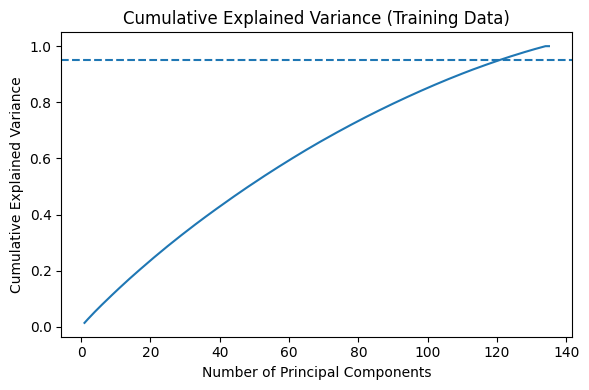

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
32 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py", line 654, in fit
    Xt = self._fit(X, y, routed_params, 

Best CV Params: {'knn__metric': 'euclidean', 'knn__n_neighbors': 7, 'pca__n_components': 80}
Best CV F1-macro: 0.4524
Test Accuracy: 0.6
Test F1-macro: 0.5664

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.94      0.65        18
           1       1.00      0.38      0.55        16
           2       0.80      0.36      0.50        11

    accuracy                           0.60        45
   macro avg       0.77      0.56      0.57        45
weighted avg       0.75      0.60      0.58        45



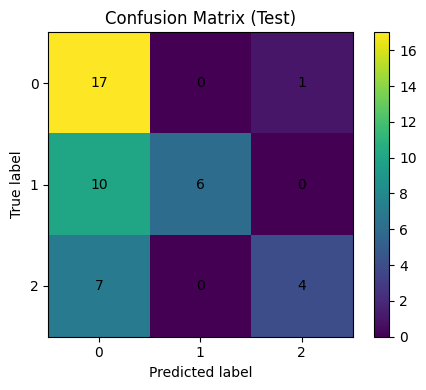

In [5]:
# High-dimensional gene-expression style demo (faster version):
# PCA to reduce dimensionality + KNN classification with CV to pick #components

import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# 1) Create a synthetic high-dimensional "gene expression" dataset (smaller for speed)
X, y = make_classification(
    n_samples=180,         # small number of patients
    n_features=1200,       # many genes (reduced for speed)
    n_informative=50,
    n_redundant=30,
    n_classes=3,
    n_clusters_per_class=2,
    weights=[0.4, 0.35, 0.25],
    class_sep=2.0,
    flip_y=0.01,
    random_state=42,
)

# Split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

# 2) Inspect cumulative explained variance on the training set
scaler = StandardScaler()
Xtr_scaled = scaler.fit_transform(X_train)
pca_full = PCA().fit(Xtr_scaled)
cum_var = np.cumsum(pca_full.explained_variance_ratio_)

# Plot cumulative explained variance to guide component choice
plt.figure(figsize=(6,4))
plt.plot(np.arange(1, len(cum_var)+1), cum_var)
plt.axhline(0.95, linestyle="--")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance (Training Data)")
plt.tight_layout()
plt.show()

# 3) Build pipeline: Scale -> PCA -> KNN
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(svd_solver="auto", random_state=42)),
    ("knn", KNeighborsClassifier())
])

# 4) Hyperparameter search for number of components + K (smaller grid for speed)
param_grid = {
    "pca__n_components": [10, 20, 40, 80, 120],
    "knn__n_neighbors": [3, 5, 7, 9],
    "knn__metric": ["euclidean", "manhattan"]
}

cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
grid = GridSearchCV(
    pipe,
    param_grid=param_grid,
    scoring="f1_macro",
    cv=cv,
    n_jobs=-1,
    refit=True
)

grid.fit(X_train, y_train)

best_params = grid.best_params_
best_cv_score = grid.best_score_

# 5) Evaluate on test set
y_pred = grid.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1m = f1_score(y_test, y_pred, average="macro")
cm = confusion_matrix(y_test, y_pred)

print("Best CV Params:", best_params)
print("Best CV F1-macro:", round(best_cv_score, 4))
print("Test Accuracy:", round(acc, 4))
print("Test F1-macro:", round(f1m, 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Show confusion matrix to inspect class-wise performance
plt.figure(figsize=(5,4))
plt.imshow(cm, interpolation="nearest")
plt.title("Confusion Matrix (Test)")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.colorbar()
tick_marks = np.arange(len(np.unique(y)))
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")
plt.tight_layout()
plt.show()
